# Assignment

In this assignment, you'll be working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project) from Kaggle. The data gives detailed state level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above.

### Context

This dataset is designed to bring together multiple facets of U.S. education data into one convenient CSV (states_all.csv). The recommended way to familiarize yourself with the data is to download and run the Data Tools Notebook.

### Contents

- states_all.csv: The primary data file. Contains aggregates from all state-level sources in one CSV.

- states_all_extended.csv: An extended version of states_all.csv; contains detailed enrollment data for race and gender.

- aggregates.zip

    - naep_states.csv: Aggregated results from the National Assessment of Educational Progress (NAEP) for states.

    - finance_states.csv: Aggregated financial data for states.

    - finance_districts.csv: Aggregated financial data for school districts.

    - enroll_states.csv: Aggregated enrollment data for states.

- elsect.zip, NDE.zip, nces_enroll.zip: Source files used to create the aggregates.

- sanity_check.txt: An auto-generated file that reports on nulls found in states_all.csv.

- enroll_sanity_check.txt: An auto-generated file that reports on nulls found in enrollment data.

### Column Breakdown
__Identification__
- PRIMARY_KEY: A combination of the year and state name.
- YEAR
- STATE

__Enrollment__

A breakdown of students enrolled in schools by school year.

- GRADES_PK: Number of students in Pre-Kindergarten education.

- GRADES_4: Number of students in fourth grade.

- GRADES_8: Number of students in eighth grade.

- GRADES_12: Number of students in twelfth grade.

- GRADES_1_8: Number of students in the first through eighth grades.

- GRADES 9_12: Number of students in the ninth through twelfth grades.

- GRADES_KG_12: Number of students in Kindergarten through twelfth grade.

- GRADES_ALL: The count of all students in the state. Comparable to ENROLL in the financial data (which is the U.S. Census Bureau's estimate for students in the state).

The extended version of states_all contains additional columns that breakdown enrollment by race and gender. For example:

- Grades_ALL_AS: Number of students whose ethnicity was classified as "Asian".

- Grades_ALL_ASM: Number of male students whose ethnicity was classified as "Asian".

- Grades_ALL_ASF: Number of female students whose ethnicity was classified as "Asian".

The represented races include AM (American Indian or Alaska Native), AS (Asian), HI (Hispanic/Latino), BL (Black or African American), WH (White), HP (Hawaiian Native/Pacific Islander), and TR (Two or More Races). The represented genders include M (Male) and F (Female).

__Financials__

A breakdown of states by revenue and expenditure.

- ENROLL: The U.S. Census Bureau's count for students in the state. Should be comparable to GRADES_ALL (which is the NCES's estimate for students in the state).

- TOTAL REVENUE: The total amount of revenue for the state.
    - FEDERAL_REVENUE
    - STATE_REVENUE
    - LOCAL_REVENUE

- TOTAL_EXPENDITURE: The total expenditure for the state.
    - INSTRUCTION_EXPENDITURE
    - SUPPORT_SERVICES_EXPENDITURE
    - CAPITAL_OUTLAY_EXPENDITURE
    - OTHER_EXPENDITURE

__Academic Achievement__

A breakdown of student performance as assessed by the corresponding exams (math and reading, grades 4 and 8).

- AVG_MATH_4_SCORE: The state's average score for fourth graders taking the NAEP math exam.

- AVG_MATH_8_SCORE: The state's average score for eight graders taking the NAEP math exam.

- AVG_READING_4_SCORE: The state's average score for fourth graders taking the NAEP reading exam.

- AVG_READING_8_SCORE: The state's average score for eighth graders taking the NAEP reading exam.

### Data Processing

The original sources can be found here:

```
#Enrollment
https://nces.ed.gov/ccd/stnfis.asp
#Financials
https://www.census.gov/programs-surveys/school-finances/data/tables.html
#Academic Achievement
https://www.nationsreportcard.gov/ndecore/xplore/NDE
```

Data was aggregated using a Python program I wrote. The code (and an explanation of how it works) can be found here.

### Methodology Notes

- Spreadsheets for NCES enrollment data for 2014, 2011, 2010, and 2009 were modified to place key data on the same sheet, making scripting easier.

- The column 'ENROLL' represents the U.S. Census Bureau data value (financial data), while the column 'GRADES_ALL' represents the NCES data value (demographic data). Though the two organizations correspond on this matter, these values (which are ostensibly the same) do vary. Their documentation chalks this up to differences in membership (i.e. what is and is not a fourth grade student).

- Enrollment data from NCES has seen a number of changes across survey years. One of the more notable is that data on student gender does not appear to have been collected until 2009. The information in states_all_extended.csv reflects this.

- NAEP test score data is only available for certain years

- The current version of this data is concerned with state-level patterns. It is the author's hope that future versions will allow for school district-level granularity.

### Acknowledgements

Data is sourced from the U.S. Census Bureau and the National Center for Education Statistics (NCES).
Licensing Notes

The licensing of these datasets state that it must not be used to identify specific students or schools. So don't do that.

### Future Goals

- Expand the assessment data processing to include race and gender.
- Expand all data sources to work at the district level, in addition to the state level.
- Create a version of the financial data that accounts for inflation.
- Add college data from my other Kaggle datasets.
- Build a validation tool that can check for incorrect data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.precision', None) #data output display settings


Access this data from the Thinkful database using the following credentials:

In [ ]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [ ]:
useducation_df.to_csv('useducation.csv',index=False)

In [3]:
useducation_df = pd.read_csv('useducation.csv')

In [4]:
useducation_df.head(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only *after* you've addressed missing values!

In [5]:
useducation2_df = useducation_df.copy()

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = useducation2_df["STATE"].unique()

# for col in fill_list:
#     for year in years:
#         useducation2_df.loc[useducation2_df["YEAR"] == year, col] = useducation2_df.loc[useducation2_df["YEAR"] == year, col].fillna(
#             useducation2_df[useducation2_df["YEAR"] == year][col].mean())

# for col in fill_list:
#     useducation2_df.loc[:, col] = useducation2_df.loc[:, col].interpolate(limit_direction='both')

for state in states:
    useducation2_df.loc[useducation2_df["STATE"] == state, fill_list] = useducation2_df.loc[useducation2_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
useducation2_df.dropna(inplace=True)

In [6]:
useducation2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 209 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     466 non-null object
STATE                           466 non-null object
YEAR                            466 non-null int64
ENROLL                          466 non-null float64
TOTAL_REVENUE                   466 non-null float64
FEDERAL_REVENUE                 466 non-null float64
STATE_REVENUE                   466 non-null float64
LOCAL_REVENUE                   466 non-null float64
TOTAL_EXPENDITURE               466 non-null float64
INSTRUCTION_EXPENDITURE         466 non-null float64
SUPPORT_SERVICES_EXPENDITURE    466 non-null float64
OTHER_EXPENDITURE               466 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      466 non-null float64
GRADES_PK_G                     466 non-null float64
GRADES_KG_G                     466 non-null float64
GRADES_4_G                      466 non-null float64
GRADES_8_G                      466 non-null flo

### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [7]:
useducation2_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,1.038843e+06,22874.634120,72083.415236,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,1.482245e+06,34605.068547,87006.137056,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,1.545200e+04,91.000000,4528.000000,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,2.443388e+05,3753.000000,20988.000000,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,6.059525e+05,13068.500000,51156.500000,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,1.046753e+06,28808.500000,79618.000000,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,249524.000000,530531.000000,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

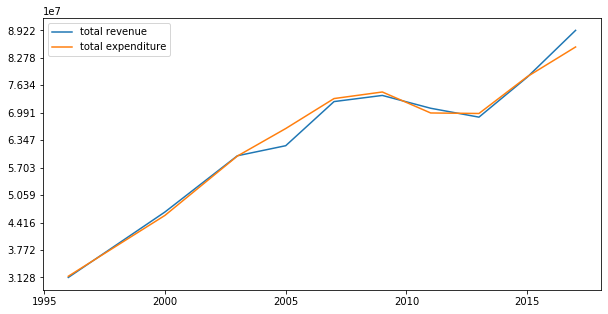

In [22]:
state_education = useducation2_df[useducation2_df['STATE']=='CALIFORNIA']

plt.figure(figsize=[10,5])
plt.plot(state_education['YEAR'], state_education['TOTAL_REVENUE'], label='total revenue')
plt.plot(state_education['YEAR'], state_education['TOTAL_EXPENDITURE'], label='total expenditure')
plt.yticks(np.linspace(state_education['TOTAL_REVENUE'].min(), state_education['TOTAL_REVENUE'].max(), num=10))
plt.legend();

### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

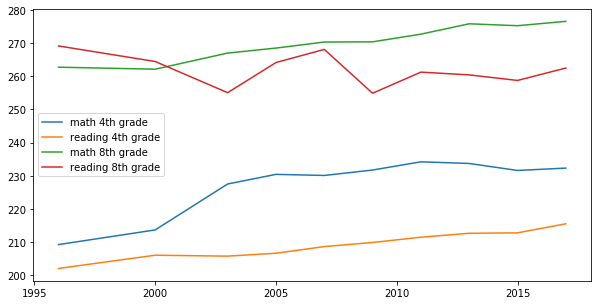

In [24]:
plt.figure(figsize=[10,5])

plt.plot(state_education['YEAR'], state_education['AVG_MATH_4_SCORE'], label='math 4th grade')
plt.plot(state_education['YEAR'], state_education['AVG_READING_4_SCORE'], label='reading 4th grade')
plt.plot(state_education['YEAR'], state_education['AVG_MATH_8_SCORE'], label='math 8th grade')
plt.plot(state_education['YEAR'], state_education['AVG_READING_8_SCORE'], label='reading 8th grade')

#plt.yticks(np.linspace(state_education['TOTAL_REVENUE'].min(), state_education['TOTAL_REVENUE'].max(), num=10))
plt.legend();

### 4. What are the distributions of the math and reading scores in the sample?

In [25]:
useducation2_df[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,466.000000,466.000000,466.000000
mean,236.909728,279.802668,219.508638,263.789943
std,8.695903,9.381511,7.426546,6.875627
min,187.134670,232.831510,181.626990,236.379102
25%,232.760641,274.707118,215.338956,259.661771
50%,238.394124,281.531587,221.130461,265.217081
75%,242.602566,286.197041,224.531280,268.307884
max,253.420961,300.568235,236.773867,280.499130


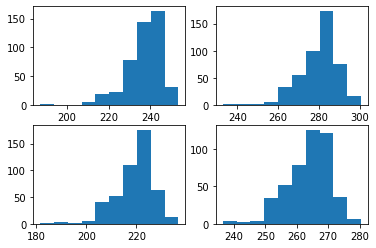

In [26]:
plt.subplot(2,2,1)
plt.hist(useducation2_df['AVG_MATH_4_SCORE'])

plt.subplot(2,2,2)
plt.hist(useducation2_df['AVG_MATH_8_SCORE'])

plt.subplot(2,2,3)
plt.hist(useducation2_df['AVG_READING_4_SCORE'])

plt.subplot(2,2,4)
plt.hist(useducation2_df['AVG_READING_8_SCORE']);

### 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.